In [2]:
from haskellian import funcs as F
import pure_cv as vc
import cv2 as cv
import numpy as np
from scoresheet_models import Model, models, draw
import robust_extraction as re
from robust_extraction import templates as ts, contours as cs, lines as ls, match1d
sheet = cv.imread('../images/models/andorra/l.jpg')

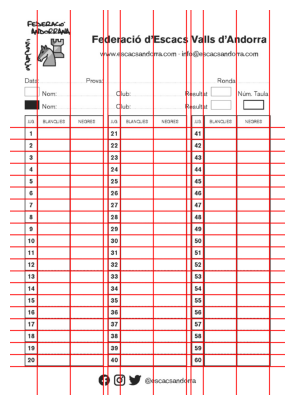

In [34]:
SPACE_W = 0.008
NUM_W = 0.022
model = Model(
  boxWidth=0.06,
  rows=20,
  columns=[None, SPACE_W, NUM_W, None, SPACE_W, NUM_W, None]
)
vc.show(draw(sheet, model, t=[90, 390], s=[1840, 795], thickness=2))

In [3]:
from robust_extraction.templates import SheetModel, Template1d

model = SheetModel(
  cols=Template1d(
    offsets=[1, 1, 1, 1, 1],
    a=0, b=5
  ),
  rows=Template1d(
    offsets=[1 for _ in range(36)],
    a=4, b=35
  ),
  block_cols=[0, 2]
)

In [4]:
# rows, cols = re.descaled_extract(sheet, model, autocorrect=False)
# xs = ls.poly.intersect_all(rows, cols)
# imp_rows = list(range(model.rows.b - model.rows.a))
# for i, j in ts.contiguous_boxes(imp_rows[:-1], model.block_cols):
#   cnt = ts.contour(i, j, xs.get)
#   if cnt is None:
#     print(i, j)

# vc.show(F.pipe(
#   sheet,
#   *[vc.draw.lines(lines=r) for i, r in enumerate(rows)],
#   *[vc.draw.lines(lines=c, color=vc.mod_color(i, 5)) for i, c in enumerate(cols)]
# ))

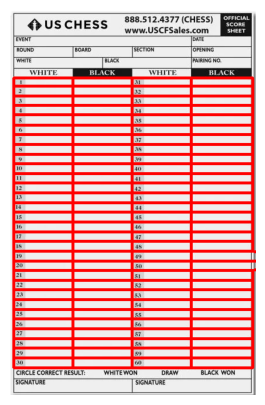

In [5]:
res = re.descaled_extract(sheet, model, autocorrect=False).unsafe()
vc.show(vc.draw.contours(res.corr_img, res.contours))

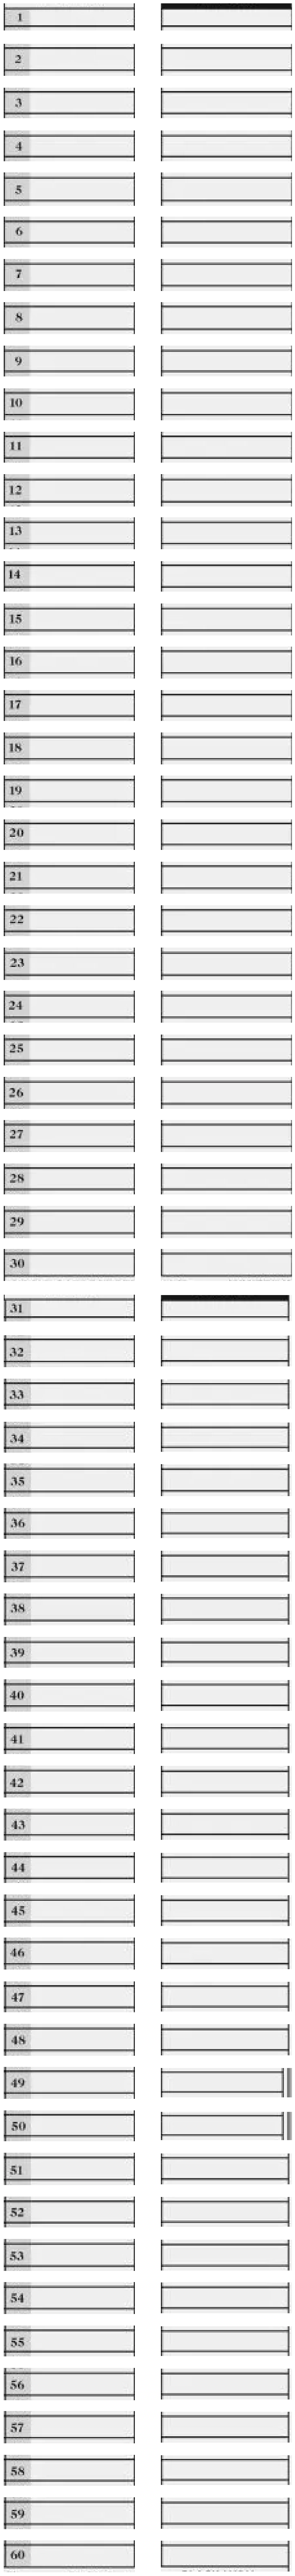

In [8]:
vc.show(*res.boxes, ncols=2, height=1.5)